<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/SM_03_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Bootstrap com Python

### Objetivo:

1 - Explicar o conceito de reamostragem por bootstrap.

2 - Demonstrar a implementação do bootstrap usando a base de dados tips do seaborn.

3 - Calcular intervalos de confiança para a média do total da gorjeta (coluna tip) usando a técnica de reamostragem.


### Passo 1: Carregar a Base de Dados e Explorar


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregando a base de dados 'tips' do seaborn
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A base de dados tips possui informações como:
    - total_bill: o valor total da conta.
    - tip: a gorjeta dada.
    - sex: gênero da pessoa que deu a gorjeta.
    - smoker: se a pessoa é fumante ou não.
    - day: dia da semana.
    - time: refeição (almoço ou jantar).
    - size: número de pessoas na mesa.

Nosso foco será na coluna tip, onde aplicaremos o bootstrap para calcular intervalos de confiança para a média das gorjetas.

### Passo 2: Entender o Bootstrap

O bootstrap é uma técnica de reamostragem com reposição que ajuda a estimar a distribuição de uma estatística (por exemplo, média ou mediana) com base em uma única amostra, ao invés de dados populacionais completos.

Para isso, seguimos estes passos:
    - Selecionamos uma amostra com reposição da amostra original.
    - Calculamos a estatística de interesse (aqui, a média da gorjeta) para cada amostra gerada.
    - Repetimos o processo várias vezes (milhares, idealmente) para criar uma distribuição das médias.
    - Usamos essa distribuição para calcular o intervalo de confiança desejado.
    
### Passo 3: Implementação do Bootstrap em Python

Agora, vamos implementar o bootstrap para calcular um intervalo de confiança para a média das gorjetas.

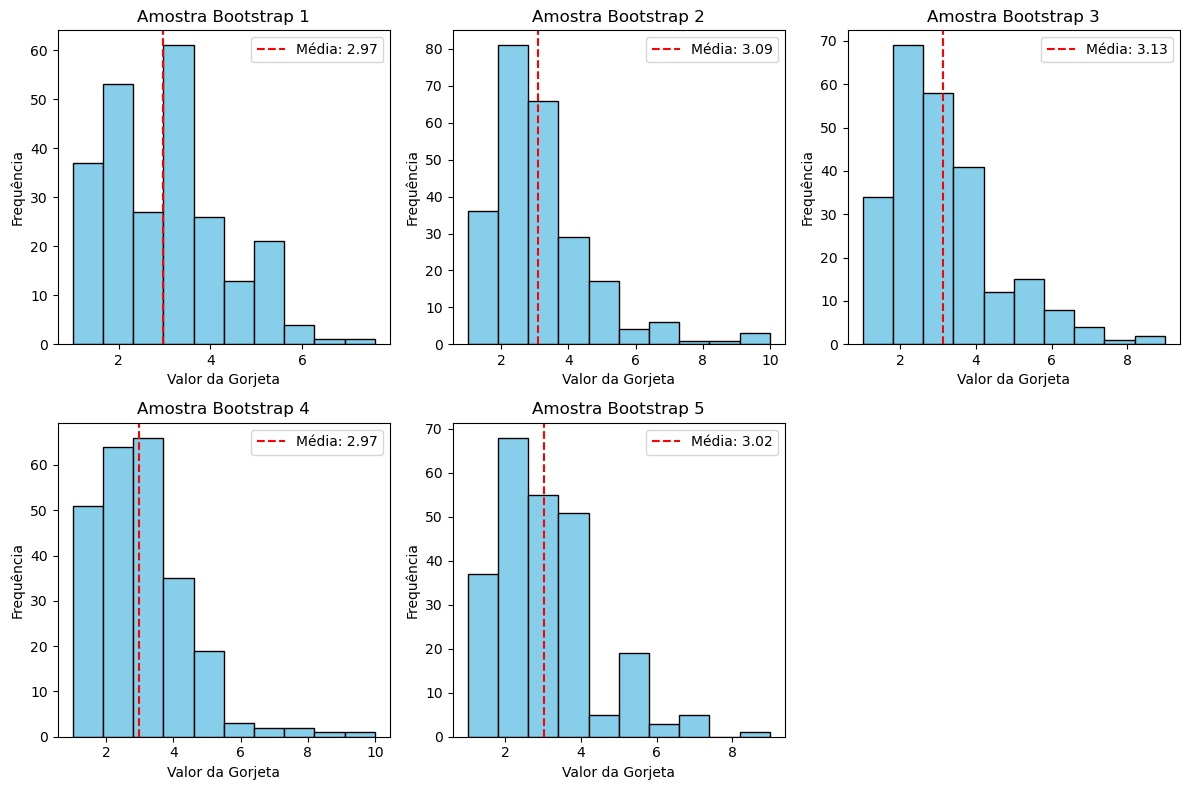

In [ ]:
# Parâmetros do Bootstrap
n_iterations = 1000  # Número de reamostragens
sample_size = len(data)  # Tamanho da amostra
bootstrap_means = []

# Visualizar as primeiras 5 amostras
num_samples_to_display = 5

plt.figure(figsize=(12, 8))

for i in range(n_iterations):
    # Reamostragem com reposição
    sample = data['tip'].sample(n=sample_size, replace=True)
    # Calculando a média da amostra
    sample_mean = sample.mean()
    # Salvando a média calculada
    bootstrap_means.append(sample_mean)

    # Visualização das primeiras amostras
    if i < num_samples_to_display:
        plt.subplot(2, 3, i + 1)  # Criando subplots
        plt.hist(sample, bins=10, color='skyblue', edgecolor='black')
        plt.axvline(sample_mean, color='red', linestyle='--', label=f'Média: {sample_mean:.2f}')
        plt.title(f'Amostra Bootstrap {i + 1}')
        plt.xlabel('Valor da Gorjeta')
        plt.ylabel('Frequência')
        plt.legend()

# Ajuste dos subplots
plt.tight_layout()
plt.show()


Intervalo de confiança de 95% para a média das gorjetas: [2.83791086 3.17803689]


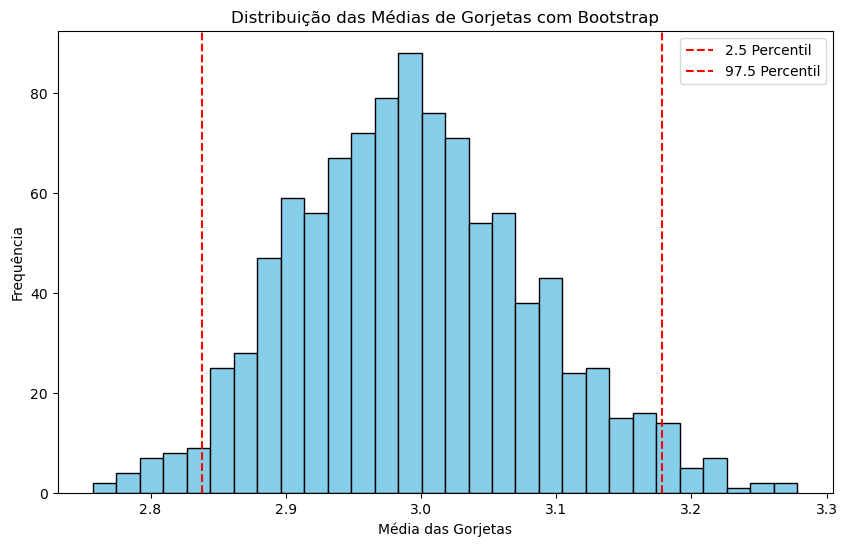

In [ ]:
# Convertendo para array para facilitar cálculos estatísticos
bootstrap_means = np.array(bootstrap_means)

# Calculando o intervalo de confiança de 95%
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print("Intervalo de confiança de 95% para a média das gorjetas:", confidence_interval)

# Visualização da distribuição final das médias de bootstrap
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='2.5 Percentil')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='97.5 Percentil')
plt.xlabel('Média das Gorjetas')
plt.ylabel('Frequência')
plt.title('Distribuição das Médias de Gorjetas com Bootstrap')
plt.legend()
plt.show()

### Curiosidades

O bootstrap é uma técnica bastante utilizada em algoritmos de machine learning, especialmente em métodos de ensemble, onde a ideia é combinar vários modelos para melhorar o desempenho e a robustez das previsões. Os algoritmos que mais utilizam o bootstrap incluem:

1. **Bagging (Bootstrap Aggregating)**:
   - **Random Forest**: É uma extensão do algoritmo de árvores de decisão, onde várias árvores são treinadas em diferentes subconjuntos da amostra original, usando o método bootstrap com reposição. A média ou maioria das previsões dessas árvores compõe a previsão final, o que melhora a robustez e reduz o overfitting.
   - **Bagged Trees**: Similar ao Random Forest, mas sem a aleatoriedade adicional introduzida na escolha dos atributos para divisão. Utiliza apenas o bootstrap para criar diferentes subconjuntos de dados e treina árvores independentes, que são combinadas ao final.

2. **Gradient Boosting**:
   - **Gradient Boosting Machines (GBM)**: Utiliza reamostragem para treinar uma sequência de modelos, cada um ajustado para corrigir os erros do modelo anterior. Embora o gradient boosting não aplique o bootstrap no mesmo sentido que o bagging, ele também pode usar subconjuntos da amostra original em cada etapa do treinamento.
   - **XGBoost, LightGBM, CatBoost**: São variações do gradient boosting, muito eficientes para dados estruturados e populares em competições de machine learning. Eles implementam técnicas avançadas de gradient boosting, aplicando amostragem em cada passo de treino para reduzir o overfitting e melhorar a eficiência computacional.

3. **Bootstrap para Estimativa de Modelos e Variância**:
   - Alguns métodos não se baseiam diretamente em modelos de ensemble, mas podem usar bootstrap para estimar intervalos de confiança e variância nas previsões. Redes neurais e SVMs, por exemplo, podem ser combinados com o bootstrap para produzir intervalos de confiança para as previsões, embora isso não faça parte de sua implementação padrão.

### Diferenças Entre Bagging e Boosting:
- **Bagging** (usando bootstrap) tende a reduzir a variância do modelo, pois cada modelo é treinado independentemente com um subconjunto diferente dos dados, e as previsões são combinadas ao final.
- **Boosting** foca em reduzir o viés ao treinar modelos sequenciais onde cada novo modelo ajusta os erros do anterior, e o bootstrap pode ser usado para gerar subconjuntos na atualização desses modelos.

Esses métodos são amplamente aplicados em machine learning e ajudam a melhorar tanto a precisão quanto a robustez dos modelos.